In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_AE_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,4.0,3.0,2,7,8,2,9,11,7.0,7,1.0,8.0,5.0,6,NaN
1,4.0,7.0,5.0,5.0,5,5,9,6,4,8,7.0,9,2.0,9.0,7.0,10,NaN
2,7.0,10.0,8.0,7.0,4,8,8,5,10,11,2.0,8,2.0,5.0,5.0,10,NaN
3,4.0,9.0,5.0,7.0,4,7,7,13,1,7,6.0,8,3.0,8.0,0.0,8,NaN
4,6.0,7.0,8.0,5.0,4,7,6,3,7,10,7.0,9,3.0,8.0,3.0,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,10.0,5.0,8.0,3,4,10,7,8,12,10.0,9,2.0,9.0,2.0,6,NaN
19996,NaN,NaN,NaN,NaN,3,7,8,2,10,12,NaN,8,NaN,NaN,NaN,8,NaN
19997,4.0,8.0,4.0,6.0,4,7,8,7,4,10,7.0,6,3.0,9.0,3.0,7,NaN
19998,4.0,11.0,4.0,8.0,3,0,2,4,6,1,0.0,7,0.0,8.0,0.0,8,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	4000
float64		column 2	4000
float64		column 3	4000
float64		column 4	4000
int64		column 5	0
int64		column 6	0
int64		column 7	0
int64		column 8	0
int64		column 9	0
int64		column 10	0
float64		column 11	4000
int64		column 12	0
float64		column 13	4000
float64		column 14	4000
float64		column 15	4000
int64		column 16	0
float64		column 17	20000


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,16000.000000,16000.000000,16000.000000,16000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,16000.000000,20000.000000,16000.000000,16000.000000,16000.000000,20000.00000,0.0
mean,4.015750,7.016625,5.118437,5.348625,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.499125,7.929000,3.069313,8.350062,3.700563,7.80120,NaN
std,1.905513,3.285464,1.992431,2.247783,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.590086,2.080619,2.331276,1.539332,2.566089,1.61747,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,2.000000,8.000000,2.000000,7.00000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.00000,NaN
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,9.00000,NaN
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,NaN


<AxesSubplot:>

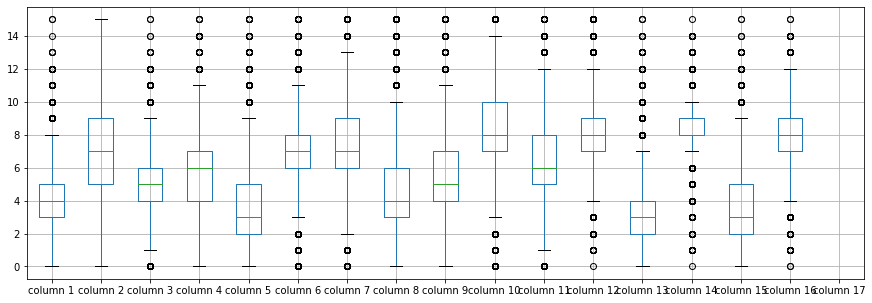

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     4.015750
column 2     7.016625
column 3     5.118437
column 4     5.348625
column 5     3.505850
column 6     6.897600
column 7     7.500450
column 8     4.628600
column 9     5.178650
column 10    8.282050
column 11    6.499125
column 12    7.929000
column 13    3.069313
column 14    8.350062
column 15    3.700563
column 16    7.801200
column 17         NaN
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.758452,0.849153,0.671683,0.611398,-0.044696,0.043621,0.008151,0.036686,0.135797,0.031474,-0.054530,0.489624,0.101298,0.259700,-0.126291,NaN
column 2,0.758452,1.000000,0.671309,0.821270,0.551882,0.033504,-0.035126,-0.037371,0.078994,0.150273,-0.053140,-0.024012,0.278963,0.009737,0.221988,-0.063139,NaN
column 3,0.849153,0.671309,1.000000,0.658015,0.761088,0.048235,0.020529,-0.106675,0.046833,0.102568,0.011750,-0.049017,0.557280,0.047212,0.245925,-0.141243,NaN
column 4,0.671683,0.821270,0.658015,1.000000,0.643104,0.032630,-0.020850,0.070290,0.037907,0.000675,-0.010694,0.007188,0.269250,0.035286,0.290210,-0.039735,NaN
column 5,0.611398,0.551882,0.761088,0.643104,1.000000,0.139159,-0.028822,-0.011985,-0.065557,-0.069776,-0.079464,-0.038858,0.628751,0.015733,0.484318,-0.062969,NaN
column 6,-0.044696,0.033504,0.048235,0.032630,0.139159,1.000000,-0.356580,-0.053306,-0.122851,0.085963,-0.361131,-0.032115,0.138784,-0.253289,0.128667,0.248816,NaN
column 7,0.043621,-0.035126,0.020529,-0.020850,-0.028822,-0.356580,1.000000,-0.118625,-0.049658,0.178318,0.592566,-0.271649,-0.058451,0.553389,-0.099445,-0.207900,NaN
column 8,0.008151,-0.037371,-0.106675,0.070290,-0.011985,-0.053306,-0.118625,1.000000,-0.188431,-0.317780,0.034177,0.082020,0.149255,-0.084979,-0.000958,0.182902,NaN
column 9,0.036686,0.078994,0.046833,0.037907,-0.065557,-0.122851,-0.049658,-0.188431,1.000000,0.132000,-0.061070,0.119048,-0.390838,-0.049994,0.267921,-0.061335,NaN
column 10,0.135797,0.150273,0.102568,0.000675,-0.069776,0.085963,0.178318,-0.317780,0.132000,1.000000,0.046142,-0.106759,-0.195733,0.032432,-0.107113,-0.114223,NaN


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [ ]:
imputer = md.Midas(layer_structure = [17,17+66,17+66+66,17+66+66+66,17+66+66,17+66,17], vae_layer = False, seed = 660)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 58.93021070861816
Epoch: 1 , loss: 43.72455938720703
Epoch: 2 , loss: 41.020929679870605
Epoch: 3 , loss: 39.861539122009276
Epoch: 4 , loss: 39.066796063232424
Epoch: 5 , loss: 38.62400615234375
Epoch: 6 , loss: 38.34263622131348
Epoch: 7 , loss: 38.1461780960083
Epoch: 8 , loss: 38.043496420288086
Epoch: 9 , loss: 37.73142133331299
Epoch: 10 , loss: 37.6629606918335
Epoch: 11 , loss: 37.60447737579346
Epoch: 12 , loss: 37.63595926208496
Epoch: 13 , loss: 37.46057163238525
Epoch: 14 , loss: 37.46361952667236
Epoch: 15 , loss: 37.34127745361328
Epoch: 16 , loss: 37.25067287902832
Epoch: 17 , loss: 37.243317837524415
Epoch: 18 , loss: 37.13026764984131
Epoch: 19 , loss: 37.04063200073242
Epoch: 20 , loss: 37.16165240478516
Epoch: 21 , loss: 37.025887178039554
Epoch: 22 , loss: 36.95137738800049
Epoch: 23 , loss: 36.87258264770508
Epoch: 24 , loss: 36.95514213256836
Epoch: 25 , loss: 36.940836282348634
E

In [ ]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

In [ ]:
new_df=imputations[-1]
new_df.iloc[21,:]


In [ ]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [ ]:
new_df-complete_df

Calculating NRMSE Value

In [ ]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [ ]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [ ]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

In [ ]:
denominator=Frobenius_norm(complete_df)
denominator

In [ ]:
NRMS=numerator/denominator
NRMS


In [ ]:
new_df.iloc[66,:]

In [ ]:
imputations[-1]


In [ ]:
imputations[-1].to_excel("Letter_AE_10(imp).xlsx", index=False, header=False)